# Linear regression: overfitting and regularization


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Dataset  __"bikes_rent.csv"__ contains information wether conditions and number of renterd bickes.

In [3]:
df = pd.read_csv('bikes_rent.csv',header=0)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Features description:

* _season_: 1 - spring, 2 - summer, 3 - fall, 4 - winter
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: 1 - 12
* _holiday_: 0 - not holiday, 1 - holiday
* _weekday_:  0 - 6
* _workingday_: 0 - no, 1 - yes
* _weathersit_: 1 (sunny) до 4 (rain)
* _temp_: Celsius degrees
* _atemp_: feel like temp
* _hum_: humidity
* _windspeed(mph)_: speed of wind (mph)
* _windspeed(ms)_: speed of wind (ms)
* _cnt_: number of rented bickes (target)


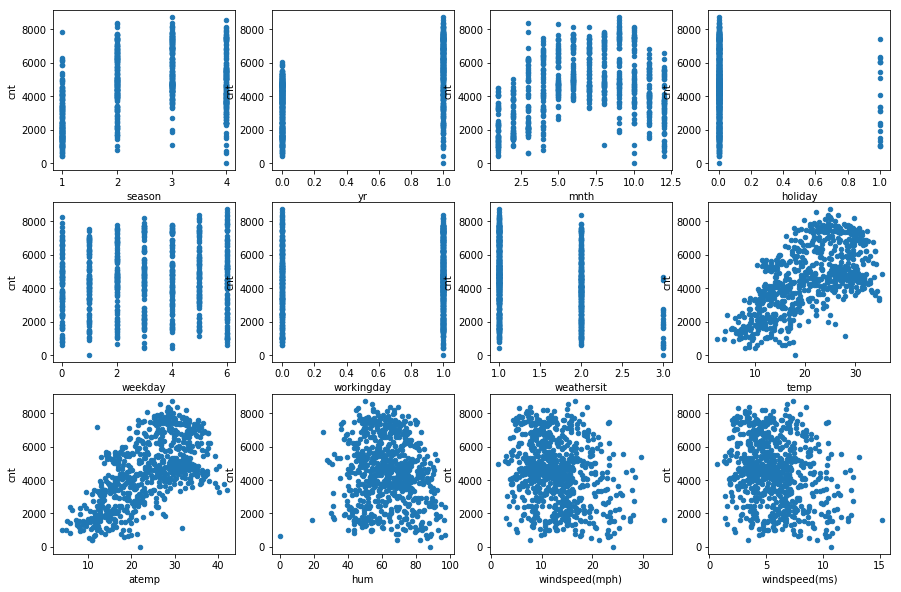

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx / 4, idx % 4])

The number of rentals depends quadratically on the month and linerly on year and holidays. 

Let's more strictly estimate the level of linear dependence between the characteristics and the target variable. A good measure of the linear relationship between the two vectors is the Pearson correlation.

In [5]:
df1=df.drop(['cnt'],axis=1)
df1.corrwith(df.cnt)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In the sample, there are features that correlate with the target, and therefore the problem can be solved by linear methods.

The graphs show that some of the features are similar to each other. Therefore, let us also calculate the correlation between the physical characteristics.

In [6]:
df.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],axis=1).corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


There are two more pairs of strongly correlated columns: temp and atemp (correlated by nature) and two windspeed (because this is just the translation of some units into others)

In [7]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

The features have a different scale, so for the future work we better normalize the matrix objects-features.

First, we scale, or standardize the features: from each feature, subtract its average and divide by the standard deviation. This can be done with the scale method.
In addition, you need to mix the sample, this is required for cross-validation.

In [8]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [9]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Let's train the linear regression on our data and look at the weights of the features.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear_regressor=LinearRegression()
zip(df.columns,linear_regressor.fit(X,y).coef_)


[('season', 570.8665480187842),
 ('yr', 1021.9698024187255),
 ('mnth', -141.3021565645068),
 ('holiday', -86.76080221822266),
 ('weekday', 137.22389417600084),
 ('workingday', 56.39180770377652),
 ('weathersit', -330.22887165300517),
 ('temp', 367.48309234525743),
 ('atemp', 585.5469917580082),
 ('hum', -145.60948043207213),
 ('windspeed(mph)', 12458865748347.059),
 ('windspeed(ms)', -12458865748545.518)]

Мы видим, что веса при линейно-зависимых признаках по модулю значительно больше, чем при других признаках.
We see that the weights for linearly dependent features are significantly larger in absolut value than in other features.

The solution of the multicollinearity problem is the regularization of the linear model. To the optimized functional, we add L1 or L2 the weight norm multiplied by the regularization coefficient α.
In the first case, the method is called Lasso, and in the second, Ridge.

In [12]:
from sklearn.linear_model import Lasso, Ridge

In [14]:
lasso_regressor = Lasso(random_state = 3)
zip(df.columns,lasso_regressor.fit(X,y).coef_)

[('season', 560.2416160308866),
 ('yr', 1019.4634940657194),
 ('mnth', -128.73062703678735),
 ('holiday', -86.15278133371089),
 ('weekday', 137.34789390496329),
 ('workingday', 55.212370641356586),
 ('weathersit', -332.3698569623483),
 ('temp', 376.3632362096979),
 ('atemp', 576.5307935045518),
 ('hum', -144.1291550034862),
 ('windspeed(mph)', -197.1396894024856),
 ('windspeed(ms)', -2.8050001994027472e-08)]

In [15]:
ridge_regressor = Ridge(random_state = 3)
zip(df.columns,ridge_regressor.fit(X,y).coef_)

[('season', 563.0645722520176),
 ('yr', 1018.9483787875278),
 ('mnth', -131.87332028247656),
 ('holiday', -86.74609799709269),
 ('weekday', 138.00511117871892),
 ('workingday', 55.90311037506447),
 ('weathersit', -332.3497884990738),
 ('temp', 386.45788919194575),
 ('atemp', 566.3470470600292),
 ('hum', -145.071327298672),
 ('windspeed(mph)', -99.25944108181761),
 ('windspeed(ms)', -99.25944115431591)]

Let us observe how the weights change with increasing regularization coefficient α

In [17]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) 
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

for line,alpha in enumerate(alphas):
    lasso_regressor = Lasso(random_state = 3, alpha=alpha)
    a=lasso_regressor.fit(X,y).coef_
    ridge_regressor = Ridge(random_state = 3, alpha=alpha)
    b=ridge_regressor.fit(X,y).coef_
    for wi in range(0,X.shape[1]):
        coefs_lasso[line][wi]=a[wi]
        coefs_ridge[line][wi]=b[wi]

We visualize the dynamics of weights with increasing regularization parameter:

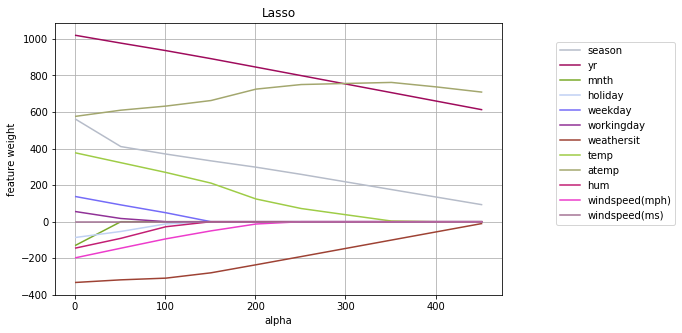

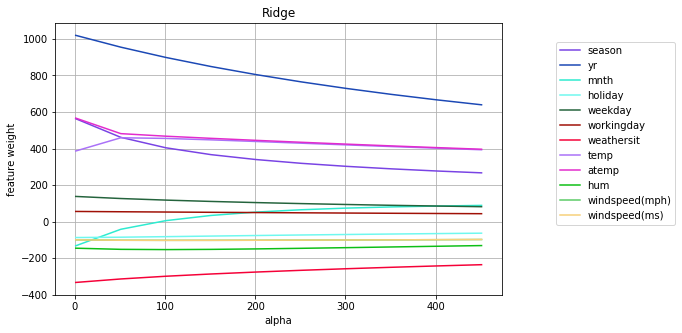

In [18]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")
plt.grid(True)

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")
plt.grid(True)

Lasso aggressively reduces weight at the same alpha.If alpha is made very large, all weights will be zero. Since an increase in alpha leads to a simplification of the model. Lasso excludes one of the features of windspeed at any value of alpha> 0, and Ridge does not exclude them entirely at the considered range of alpha values. Lasso is suitable for selection of non-informative features.

So, we see that when the alpha is changed, the model selects the coefficients of the signs in different ways. We need to choose the best alpha.

In [19]:
from sklearn.linear_model import LassoCV

alpha = 6
Weights
                 0             1
0           season  5.320190e+02
1               yr  1.015060e+03
2             mnth -1.000395e+02
3          holiday -8.329396e+01
4          weekday  1.325045e+02
5       workingday  5.155709e+01
6       weathersit -3.305599e+02
7             temp  3.706799e+02
8            atemp  5.813969e+02
9              hum -1.400074e+02
10  windspeed(mph) -1.917714e+02
11   windspeed(ms) -2.685430e-08


Text(0.5,1,u'Lasso')

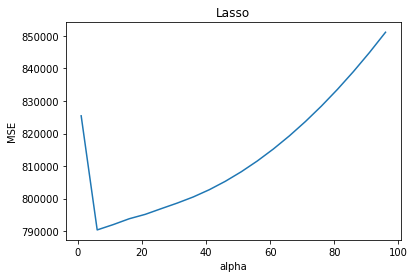

In [20]:
alphas = np.arange(1, 100, 5)
LassoCV_regressor = LassoCV(alphas=alphas)
res=LassoCV_regressor.fit(X,y)
print 'alpha =',res.alpha_
print 'Weights' 
data=pd.DataFrame(list(zip(df.columns,res.coef_)))
print data
mean_mse = np.mean(res.mse_path_, axis = 1)
plt.plot(res.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')

The features 'yr', 'atemp', 'season', 'temp' have the greatest weights in the model. It is logical to say that increasing the features of 'atemp', 'temp' after some value will negatively affect the number of rented bicycles, since it will be too hot to be on the street. The increase in the season feature will also not lead to an increase in the number of leased bicycles, so the maximum value of the feature correspontes to winter. From the dependence of 'cnt' on season, it can be seen that in the winter there is a seasonal decline in demand. It is logical to assume that the increase in the 'yr' feature alone does not affect the number of leased bicycles.